In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_color_codes("pastel")

In [2]:
partial_df = pd.read_csv("data/processed/full_dataset.csv",
                         usecols=['order_id', 'product_id', 'aisle_id', 'department_id'])

In [3]:
partial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id         int64
product_id       int64
aisle_id         int64
department_id    int64
dtypes: int64(4)
memory usage: 989.8 MB


## Histogram of number of products by order

In [4]:
num_products_by_order = partial_df[['order_id', 'product_id']].groupby(['order_id']).count()
num_products_by_order.columns = ['count']

In [18]:
summary_num_products_by_order = num_products_by_order.loc[num_products_by_order['count'] < 50, 'count'].value_counts()

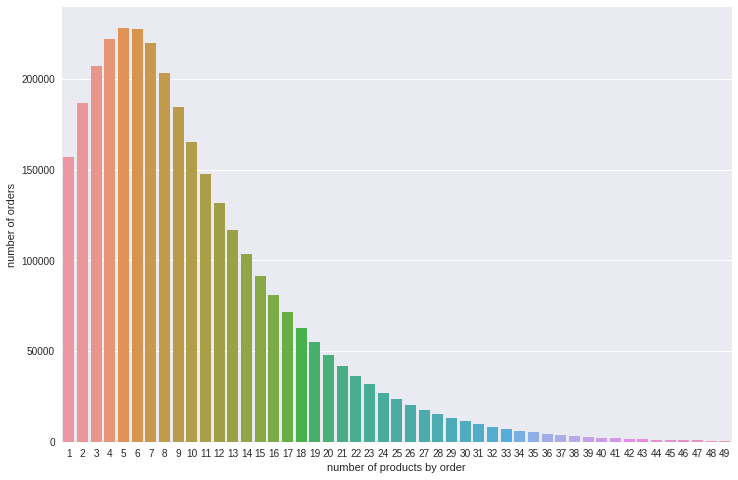

In [20]:
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=summary_num_products_by_order.index,
            y=summary_num_products_by_order.values)
ax.set_xlabel('number of products by order')
ax.set_ylabel('number of orders')
# ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)

plt.show()

## Best selling products

In [8]:
product_df = pd.read_csv("data/processed/product_aisle_department.csv")

In [9]:
product_ordered_times = partial_df[['order_id', 'product_id']].groupby(['product_id']).count()
product_ordered_times.columns = ['count']

In [10]:
product_ordered_times = pd.merge(product_ordered_times.reset_index(), product_df, on='product_id')[['product_name', 'aisle', 'department', 'count']]
product_ordered_times = product_ordered_times.sort_values(['count'], ascending=False)

In [11]:
product_ordered_times.head()

,product_name,aisle,department,count
24848,Banana,fresh fruits,produce,472565
13172,Bag of Organic Bananas,fresh fruits,produce,379450
21133,Organic Strawberries,fresh fruits,produce,264683
21899,Organic Baby Spinach,packaged vegetables fruits,produce,241921
47198,Organic Hass Avocado,fresh fruits,produce,213584


In [12]:
n = 20
best_selling_products = product_ordered_times.sort_values('count', ascending=False).head(n)

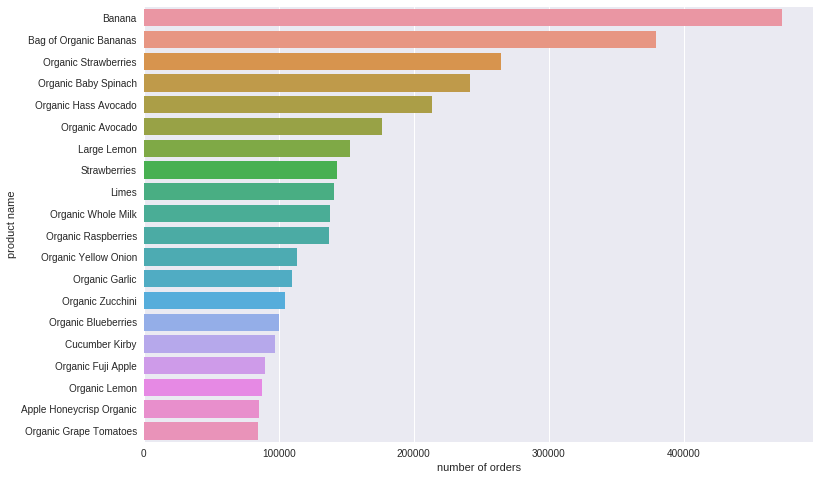

In [13]:
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=best_selling_products['count'],
            y=best_selling_products['product_name'])
ax.set_xlabel('number of orders')
ax.set_ylabel('product name')

plt.show()

## Best selling aisles

In [14]:
aisle_df = pd.read_csv("data/aisles.csv")

In [15]:
aisle_ordered_times = partial_df[['order_id', 'aisle_id']].groupby(['aisle_id']).count()
aisle_ordered_times.columns = ['count']

In [16]:
aisle_ordered_times = pd.merge(aisle_ordered_times.reset_index(), aisle_df, on='aisle_id')[['aisle', 'count']]
aisle_ordered_times = aisle_ordered_times.sort_values(['count'], ascending=False)

In [17]:
aisle_ordered_times.head()

,aisle,count
23,fresh fruits,3642188
82,fresh vegetables,3418021
122,packaged vegetables fruits,1765313
119,yogurt,1452343
20,packaged cheese,979763


In [18]:
best_selling_aisles = aisle_ordered_times.head(n)

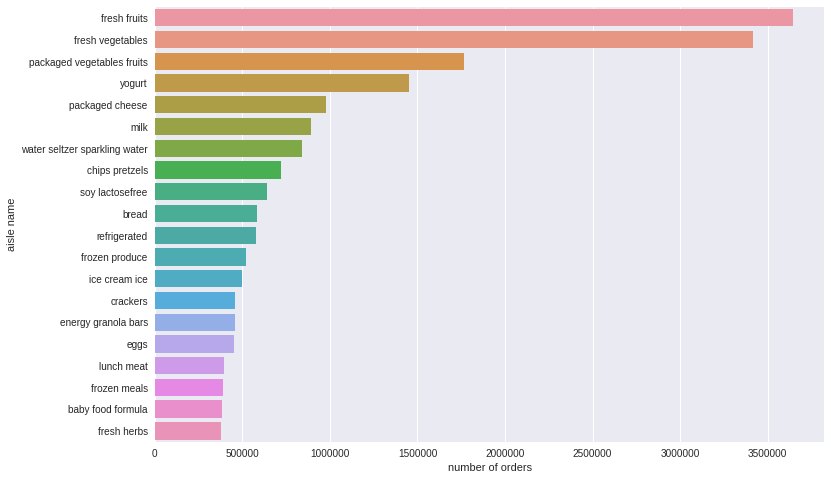

In [19]:
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=best_selling_aisles['count'],
            y=best_selling_aisles['aisle'])
ax.set_xlabel('number of orders')
ax.set_ylabel('aisle name')

plt.show()

## Best selling departments

In [20]:
department_df = pd.read_csv("data/departments.csv")

In [21]:
department_ordered_times = partial_df[['order_id', 'department_id']].groupby(['department_id']).count()
department_ordered_times.columns = ['count']

In [22]:
department_ordered_times = pd.merge(department_ordered_times.reset_index(), department_df, on='department_id')[['department', 'count']]
department_ordered_times = department_ordered_times.sort_values(['count'], ascending=False)

In [23]:
department_ordered_times.head()

,department,count
3,produce,9479291
15,dairy eggs,5414016
18,snacks,2887550
6,beverages,2690129
0,frozen,2236432


In [24]:
best_selling_departments = department_ordered_times.head(n)

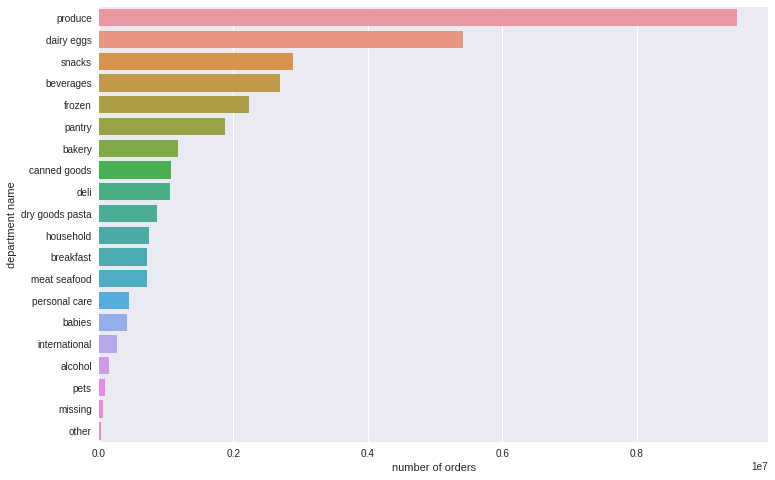

In [25]:
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=best_selling_departments['count'],
            y=best_selling_departments['department'])
ax.set_xlabel('number of orders')
ax.set_ylabel('department name')

plt.show()